# Linear Regression (Simple Linear Regression)

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
d = pd.read_csv("placement1.csv")
d = pd.DataFrame(d)
d.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [3]:
d.isnull().sum()

cgpa       0
package    0
dtype: int64

In [7]:
d.duplicated().sum()

0

In [9]:
d.shape

(200, 2)

In [11]:
x = d[["cgpa"]]
y = d["package"]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
lr.score(x_test,y_test)

0.7730984312051673

In [21]:
lr.predict([[7.82]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.46367868])

In [23]:
y_predict = lr.predict(x)

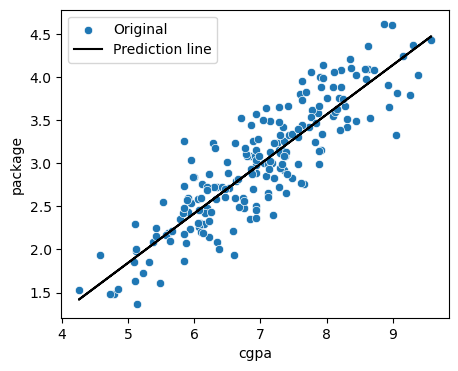

In [25]:
plt.figure(figsize = (5,4))
sns.scatterplot(x = "cgpa",y = "package",data = d)
plt.plot(d["cgpa"],y_predict,c = "black")
plt.legend(["Original","Prediction line"])
plt.show()

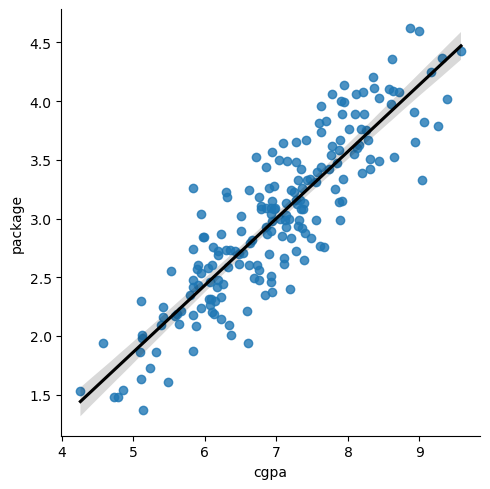

In [74]:
sns.lmplot(x = "cgpa",y = "package",data = d,line_kws={"color":"black"})
plt.show()

# Multiple Linear Regressions

In [27]:
ds = pd.read_csv("Salary_Data.csv")
ds = pd.DataFrame(ds)
ds.head(3)

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0


In [29]:
ds.isnull().sum()

Age                    2
Years of Experience    3
Salary                 5
dtype: int64

In [31]:
ds.duplicated().sum()

5417

In [33]:
ds.shape

(6704, 3)

In [35]:
ds["Age"] = ds["Age"].fillna(ds["Age"].mean())

In [37]:
ds["Salary"] = ds["Salary"].fillna(ds["Salary"].mean())

In [39]:
ds["Years of Experience"] = ds["Years of Experience"].fillna(ds["Years of Experience"].mean())

In [41]:
ds.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

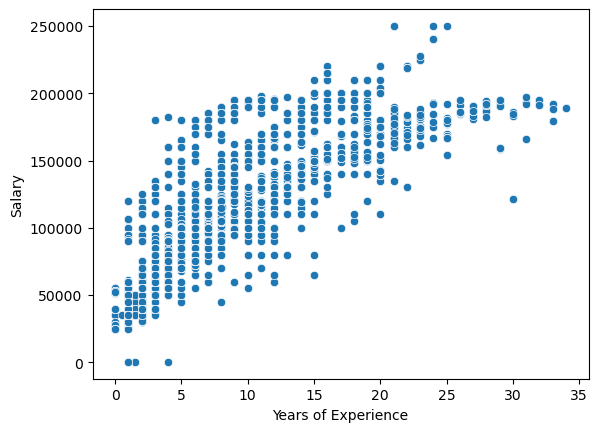

In [43]:
sns.scatterplot(x = "Years of Experience",y = "Salary",data = ds)
plt.show()

In [45]:
x = ds.iloc[:,:-1]
y = ds["Salary"]

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=90)

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
lrr = LinearRegression()

In [55]:
lrr.fit(x_train,y_train)

LinearRegression()

In [57]:
lrr.score(x_test,y_test)*100

67.75512742712233

In [59]:
lrr.predict(x)

array([ 90373.62208926,  79215.47513921, 157761.59662001, ...,
        84794.54861424, 147212.27752477,  64743.83110902])

# Polynomial Regression

In [92]:
dd = pd.read_csv("polynomial.csv")
dd = pd.DataFrame(dd)
dd.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


In [132]:
dd.columns

Index(['Level', 'Salary'], dtype='object')

In [104]:
dd.columns = dd.columns.str.strip()

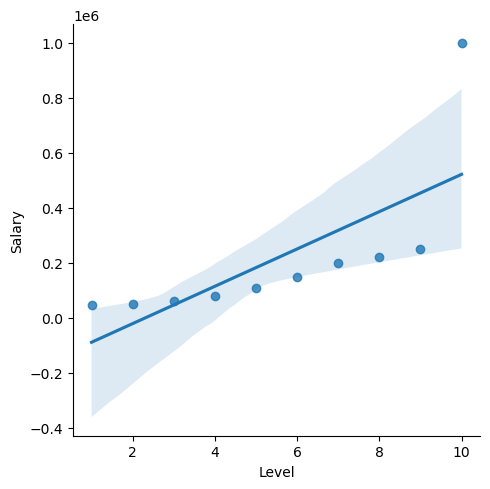

In [108]:
sns.lmplot(x ="Level",y ="Salary",data = dd)
plt.show()

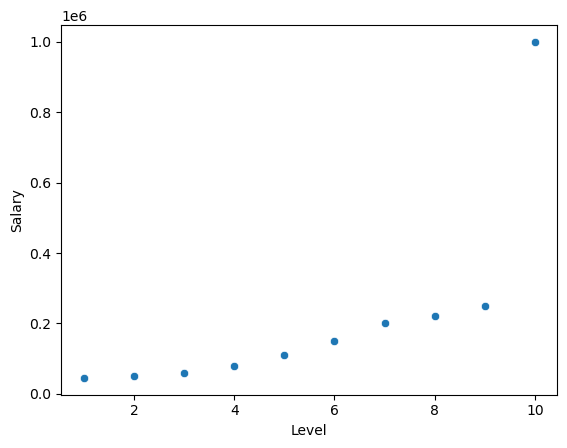

In [110]:
sns.scatterplot(x = "Level",y = "Salary",data = dd)
plt.show()

In [128]:
dd.drop(columns = ["Position"],inplace = True)

In [130]:
dd.corr()

,Level,Salary
Level,1.00000,0.72064
Salary,0.72064,1.00000


In [134]:
dd.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [138]:
x = dd[["Level"]]
y = dd["Salary"]

In [140]:
from sklearn.preprocessing import PolynomialFeatures

In [168]:
pf = PolynomialFeatures(degree = 2)
pf.fit(x)
x = pf.transform(x)

In [170]:
from sklearn.model_selection import train_test_split

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [198]:
from sklearn.linear_model import LinearRegression

In [200]:
l = LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [204]:
l.score(x_test,y_test)   # The Accuracy is low because there are less values in my dataset so its not a mistake from my side.

-1.8864286740458294

In [208]:
prd = l.predict(x)

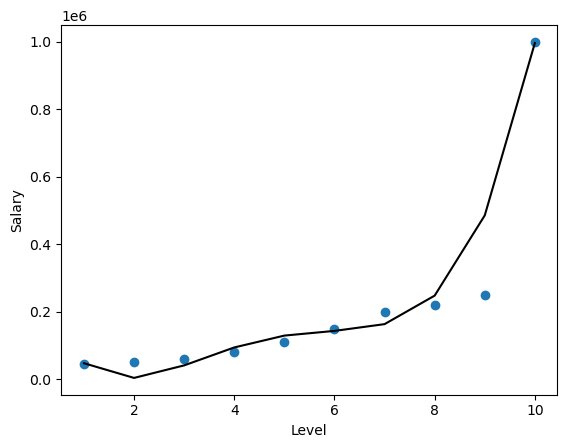

In [210]:
plt.scatter(dd["Level"],dd["Salary"])
plt.plot(dd["Level"],prd,c = 'black')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [216]:
print(f"Expected features: {pf.n_features_in_}")


Expected features: 4


# Lasso Regularization (L1) and Ridge Regularization (L2)

In [221]:
from sklearn.preprocessing import StandardScaler

In [223]:
ddd = pd.read_csv("houseprice1.csv")
ddd.head(3)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.852274
1,4272,3,3,2016,4.753014,1,6,985260.854490
2,3592,1,2,2016,3.634823,0,9,777977.390119


In [225]:
ddd.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [229]:
ddd.duplicated().sum()

0

In [233]:
ddd.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


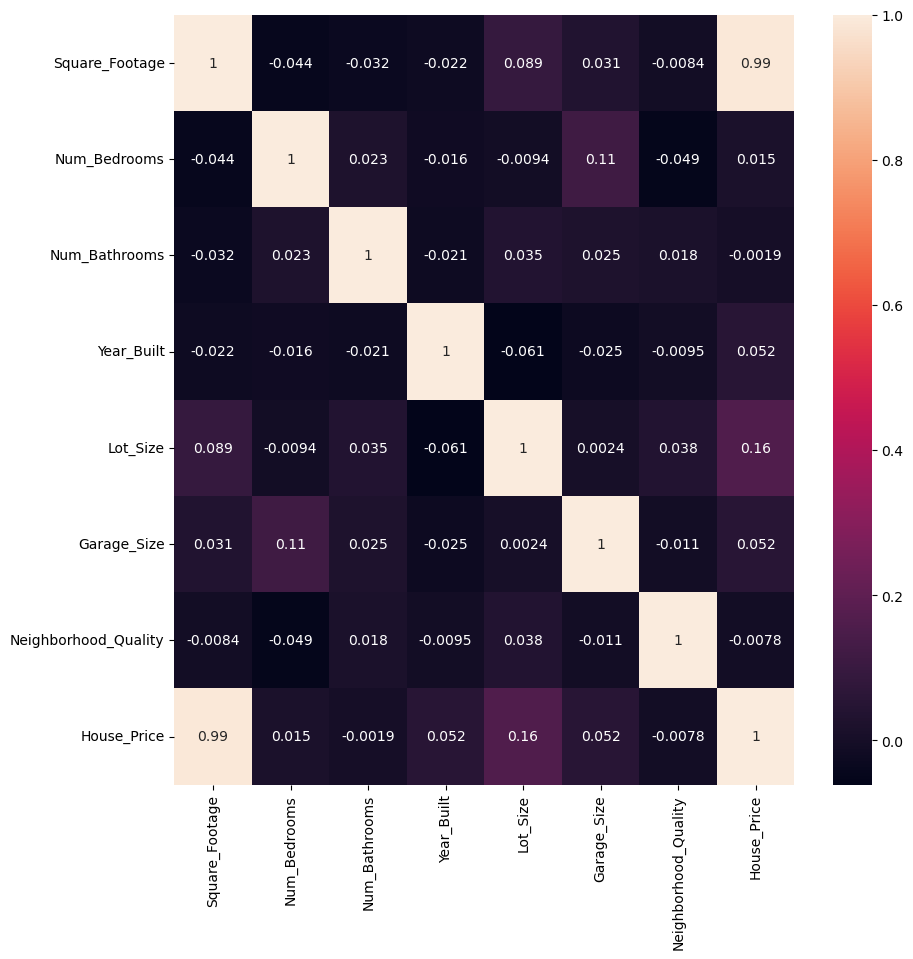

In [237]:
plt.figure(figsize=(10,10))
sns.heatmap(data = ddd.corr(),annot=True)
plt.show()

In [255]:
x = ddd.iloc[:,:-1]
y = ddd["House_Price"]

In [257]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [259]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge 

### To find out the errors in the model MSE , MAE , RMSE

In [320]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [265]:
li = LinearRegression()
li.fit(x_train,y_train)
li.score(x_test,y_test)*100

99.84263636823408

In [326]:
print(mean_squared_error(y_test,li.predict(x_test)))
print(mean_absolute_error(y_test,li.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,li.predict(x_test))))

6978960704519.04
2629512.587775456
2641772.2658319813


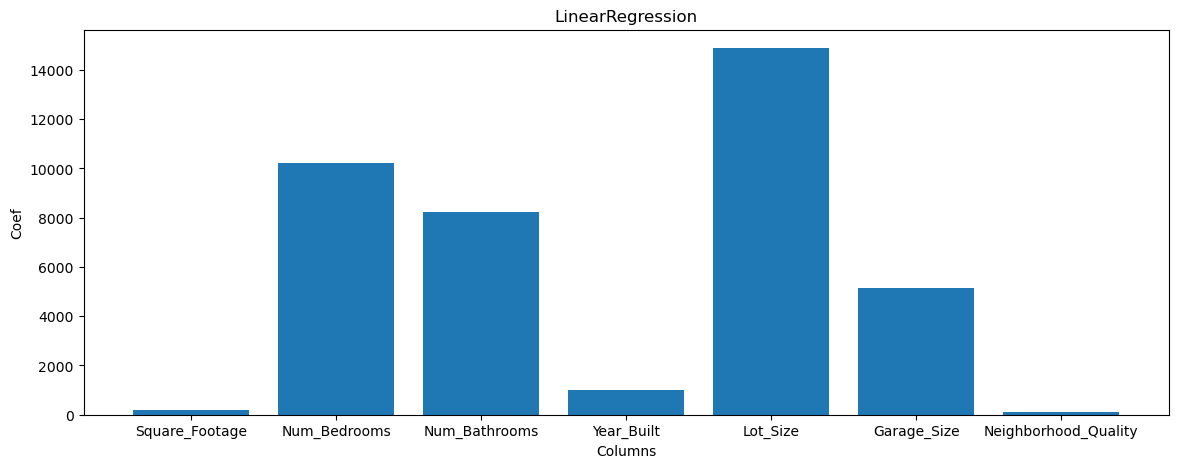

In [297]:
plt.figure(figsize = (14,5))
plt.bar(x.columns,li.coef_)
plt.title("LinearRegression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

# Trying the same model with Scaling

In [272]:
xx = ddd.iloc[:,:-1]
yy = ddd["House_Price"]

In [284]:
ss = StandardScaler()
ss.fit(xx)
xx = pd.DataFrame(ss.transform(xx),columns = xx.columns)

In [290]:
xx_train,xx_test,yy_train,yy_test = train_test_split(xx,yy,test_size=0.2,random_state=42)

In [294]:
ll = LinearRegression()
ll.fit(xx_train,yy_train)
ll.score(xx_test,yy_test)*100

99.84263636823412

# Now back to original Model

### Using Lasso 

In [304]:
la = Lasso(alpha=1.0)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

99.84263360439856

In [328]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

101436580.04246065
8174.749745022656
10071.572868348849


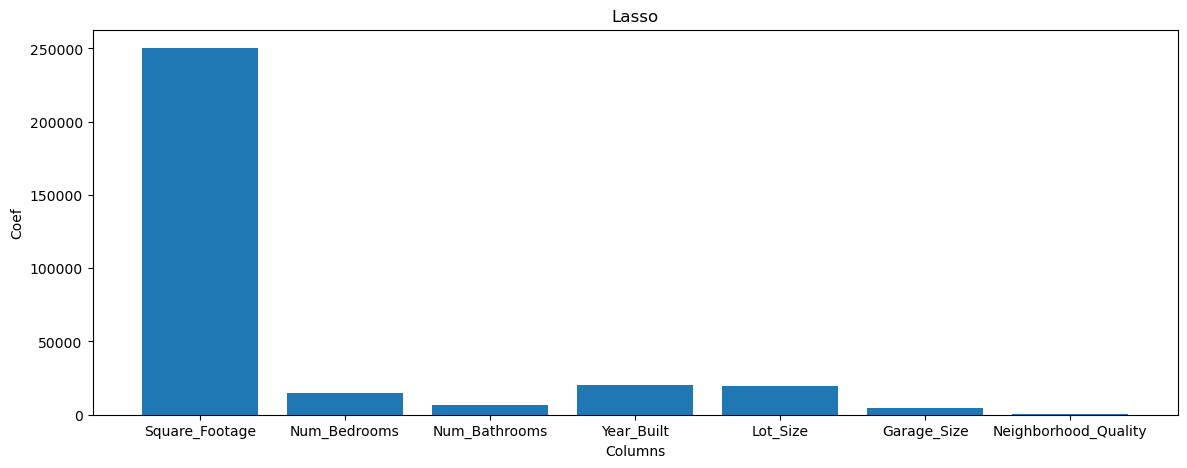

In [306]:
plt.figure(figsize = (14,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

### Using Ridge

In [313]:
ri = Ridge(alpha=1.0)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

99.8410046605628

In [330]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

102486578.62156042
8241.89835813391
10123.565509323305


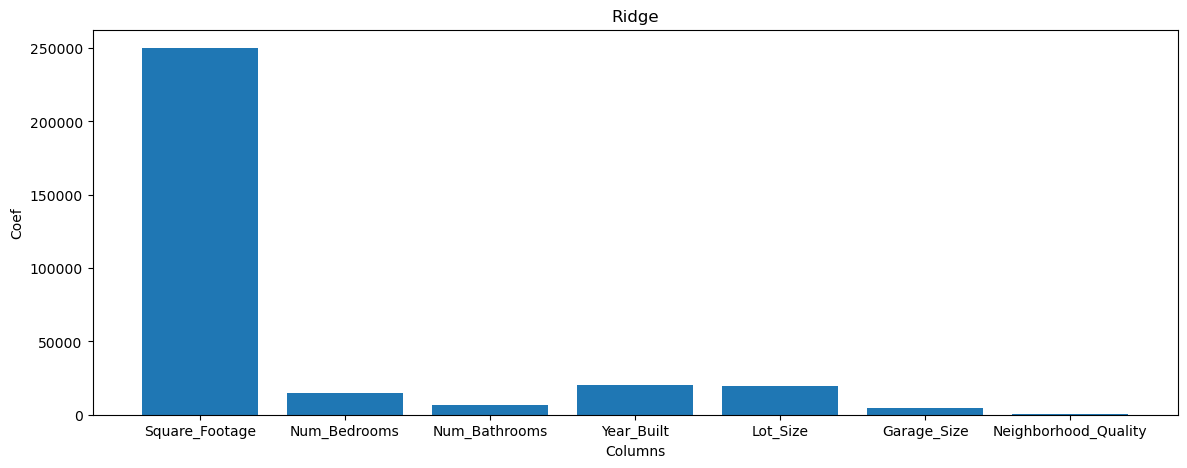

In [315]:
plt.figure(figsize = (14,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

### Viewing three models coef 

In [333]:
newd = pd.DataFrame({"Col_name" : x.columns,"LinearRegression" : li.coef_,"Lasso" : la.coef_,"Ridge" : ri.coef_}) 
newd.head()

,Col_name,LinearRegression,Lasso,Ridge
0,Square_Footage,199.513245,250365.568746,250047.558231
1,Num_Bedrooms,10225.204424,14588.821160,14560.113601
2,Num_Bathrooms,8208.434778,6729.359614,6709.442473
3,Year_Built,993.537171,20488.206794,20456.778953
4,Lot_Size,14885.384415,19309.232179,19324.293458
